稀疏化比例 epsilon = 0.1

每个 mu 值有100个 SAMPLE

RAW_SCORE 这个文件中 对于每个mu值（可以看作第零个坐标）

第一个坐标是样本编号

第二个坐标 0 代表稀疏化的网络 1 代表原网络

第三个坐标是方法 ['Euclidean NMI', 'Spherical NMI', 'Euclidean ECS', 'Spherical ECS']

RAW_QF 这个文件中，对于每个mu值（可以看作第零个坐标）

第一个坐标是样本编号

第二个坐标 0 代表稀疏化的网络 1 代表原网络

In [1]:
#隐藏警告
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pickle

#从文件加载 RAW_SCORE
with open('data/lfr_lap_raw_score.pkl', 'rb') as file:
    loaded_raw_score = pickle.load(file)

print("RAW_SCORE 已成功从 lfr_lap_raw_score.pkl 文件中加载")
#print(loaded_raw_score)

import pickle

#从文件加载 RAW_QF
with open('data/lfr_lap_raw_qf.pkl', 'rb') as file:
    loaded_raw_qf = pickle.load(file)

print("RAW_QF 已成功从 lfr_lap_raw_qf.pkl 文件中加载\n")
#print(loaded_raw_qf)

import numpy as np
step_total  = 10
step_size = 0.05
MU = np.arange(step_size, step_size*step_total+0.01, step_size)
qf_proportion = np.zeros((step_total))
qf_percentile25 = np.zeros((step_total))
qf_percentile50 = np.zeros((step_total))
qf_percentile75 = np.zeros((step_total))
qf_max = np.zeros((step_total))
ratios = {}
stat = np.zeros((step_total, 2, 4))

for mu in MU:
    ratios[mu] = loaded_raw_qf[mu][:, 0] / loaded_raw_qf[mu][:, 1]
    qf_proportion[[int(mu / step_size + 0.001) - 1]] = np.sum(ratios[mu] < 1.23)/len(ratios[mu])
    qf_percentile25[[int(mu / step_size + 0.001) - 1]] = np.percentile(ratios[mu], 25)
    qf_percentile50[[int(mu / step_size + 0.001) - 1]] = np.percentile(ratios[mu], 50)
    qf_percentile75[[int(mu / step_size + 0.001) - 1]] = np.percentile(ratios[mu], 75)
    qf_max[[int(mu / step_size + 0.001) - 1]] = np.max(ratios[mu])
    stat[int(mu / step_size + 0.001) - 1] = np.mean(loaded_raw_score[mu], axis=0)
    
def print_array_in_rows(array, row_length=5):
    reshaped_array = array.reshape(-1, row_length)
    for row in reshaped_array:
        print(" ".join(f"{x:.2f}" for x in row))

print("Proportion:")
print_array_in_rows(qf_proportion)

print("\n1st Quartile:")
print_array_in_rows(qf_percentile25)

print("\n2nd Quartile:")
print_array_in_rows(qf_percentile50)

print("\n3rd Quartile:")
print_array_in_rows(qf_percentile75)

print("\nMax Values:")
print_array_in_rows(qf_max)

RAW_SCORE 已成功从 lfr_lap_raw_score.pkl 文件中加载
RAW_QF 已成功从 lfr_lap_raw_qf.pkl 文件中加载

Proportion:
0.00 0.00 0.00 0.01 0.06
0.15 0.12 0.00 0.20 0.43

1st Quartile:
1.52 1.38 1.33 1.27 1.25
1.24 1.25 1.27 1.24 1.21

2nd Quartile:
1.57 1.42 1.36 1.30 1.27
1.26 1.26 1.28 1.26 1.24

3rd Quartile:
1.63 1.47 1.39 1.32 1.28
1.27 1.29 1.30 1.27 1.26

Max Values:
1.74 1.58 1.47 1.37 1.37
1.32 1.36 1.35 1.32 1.32


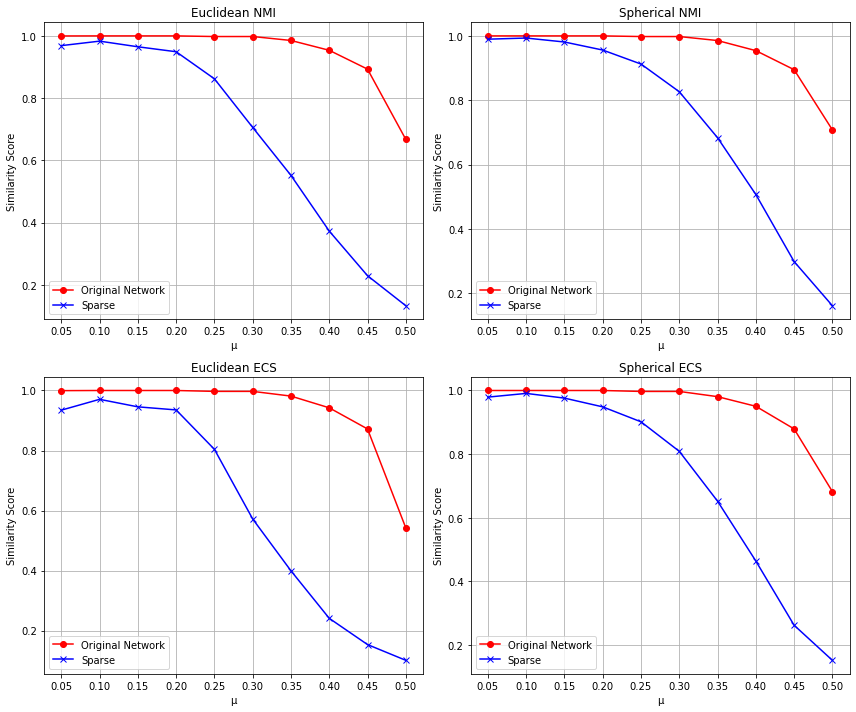

In [3]:
import numpy as np
import matplotlib.pyplot as plt


methods = [0, 1, 2, 3]
titles = ['Euclidean NMI', 'Spherical NMI', 'Euclidean ECS', 'Spherical ECS']

# 创建 2x2 网格布局
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 绘制每个 method 的折线图
for i, method in enumerate(methods):
    ax = axs[i // 2, i % 2]
    ax.plot(stat[:, 1, method], label='Original Network', color='r', marker='o')  # 红色曲线
    ax.plot(stat[:, 0, method], label='Sparse', color='b', marker='x')  # 蓝色曲线
    
    # 添加网格
    ax.grid(True)
    
    # 添加图例并设置位置
    ax.legend(loc='best')
    
    # 添加标签和标题
    x_labels = np.arange(0.05, 0.55, 0.05)
    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_xticklabels([f'{x:.2f}' for x in x_labels])
    ax.set_xlabel('μ')
    ax.set_ylabel('Similarity Score')
    ax.set_title(titles[i])
    # 设置 y 轴范围
    ax.set_ylim(0, 1)  # 这里设置 y 轴的范围为 0 到 1，可以根据实际数据调整

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()